In [1]:
import pandas as pd
import pm4py

In [2]:
print(pm4py.__version__)

2.7.15.2


In [3]:
df = pd.read_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv')

In [4]:
df['event_id'] = df['Team']#df.index.astype(str)
df['activity'] = df['Type'] #+ df['Subtype'].fillna('').apply(lambda s: f' - {s}' if s else '')
df['timestamp'] = pd.to_datetime(df['Start Time [s]'], unit='s', origin='unix')
df['attribute:duration'] = df['End Time [s]'] - df['Start Time [s]']
df['ocel:type:player']= df.apply(lambda row: [row["From"], row["To"]], axis=1)

#df.rename(columns={
#    'event_id': 'ocel:eid',
#    'activity': 'ocel:activity',
#    'timestamp': 'ocel:timestamp',
#    'From': 'ocel:type:from',
#    'To': 'ocel:type:to',
#    'Subtype': 'ocel:subtype',
#    'Start X': 'ocel:location:start_x',
#    'Start Y': 'ocel:location:start_y',
#    'End X': 'ocel:location:end_x',
#    'End Y': 'ocel:location:end_y'
#}, inplace=True)

df.rename(columns={
    'event_id': 'case:concept:name',
    'activity': 'concept:name',
    'timestamp': 'time:timestamp',
    #'From': 'ocel:type:from',
    #'To': 'ocel:type:to',
    'Subtype': 'attribute:subtype',
    'Start X': 'attribute:start_x',
    'Start Y': 'attribute:start_y',
    'End X': 'attribute:end_x',
    'End Y': 'attribute:end_y'
}, inplace=True)
df
#df.to_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData_ocel.csv', index=False)

,Team,Type,attribute:subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,attribute:start_x,attribute:start_y,attribute:end_x,attribute:end_y,case:concept:name,concept:name,time:timestamp,attribute:duration,ocel:type:player
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN,Away,SET PIECE,1970-01-01 00:00:00.040,-0.04,"[Player19, nan]"
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43,Away,PASS,1970-01-01 00:00:00.040,0.08,"[Player19, Player21]"
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21,Away,PASS,1970-01-01 00:00:00.120,0.56,"[Player21, Player15]"
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31,Away,PASS,1970-01-01 00:00:01.800,0.64,"[Player15, Player19]"
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47,Away,PASS,1970-01-01 00:00:03.080,0.76,"[Player19, Player21]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95,Home,PASS,1970-01-01 01:35:34.440,4.88,"[Player12, Player13]"
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69,Home,PASS,1970-01-01 01:35:43.120,0.60,"[Player13, Player4]"
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61,Home,BALL LOST,1970-01-01 01:35:43.920,0.80,"[Player4, nan]"
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN,Away,RECOVERY,1970-01-01 01:35:44.680,0.00,"[Player16, nan]"


In [5]:
from pm4py.objects.ocel.util.log_ocel import from_traditional_pandas as pd_to_ocel

In [6]:
parameters = {
    "activity_key": "concept:name",
    "timestamp_key": "time:timestamp",
    "case_id_key": "case:concept:name",
    "target_object_type": "Team",
    "case_attribute_prefix": "attribute:"
}

ocel=pd_to_ocel(df, parameters=parameters)

c:\Users\Vito\Documents\pm\Soccer\.venv\lib\site-packages\pm4py\objects\ocel\util\log_ocel.py:178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relations[ocel_constants.DEFAULT_OBJECT_TYPE] = target_object_type


In [24]:
ocel.get_extended_table()

,ocel:eid,attribute:start_y,To,Type,End Time [s],attribute:start_x,ocel:activity,ocel:type:player,Start Time [s],Start Frame,End Frame,attribute:end_x,Team,ocel:timestamp,Period,attribute:duration,attribute:subtype,From,attribute:end_y,ocel:type:Team
0,E0,NaN,NaN,SET PIECE,0.00,NaN,SET PIECE,"[Player19, nan]",0.04,1,0,NaN,Away,1970-01-01 00:00:00.040,1,-0.04,KICK OFF,Player19,NaN,[Player19]
1,E1,0.39,Player21,PASS,0.12,0.45,PASS,"[Player19, Player21]",0.04,1,3,0.55,Away,1970-01-01 00:00:00.040,1,0.08,NaN,Player19,0.43,[Player19]
2,E2,0.43,Player15,PASS,0.68,0.55,PASS,"[Player21, Player15]",0.12,3,17,0.58,Away,1970-01-01 00:00:00.120,1,0.56,NaN,Player21,0.21,[Player21]
3,E3,0.19,Player19,PASS,2.44,0.55,PASS,"[Player15, Player19]",1.80,45,61,0.45,Away,1970-01-01 00:00:01.800,1,0.64,NaN,Player15,0.31,[Player15]
4,E4,0.32,Player21,PASS,3.84,0.45,PASS,"[Player19, Player21]",3.08,77,96,0.49,Away,1970-01-01 00:00:03.080,1,0.76,NaN,Player19,0.47,[Player19]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,E1740,0.33,Player13,PASS,5739.32,0.60,PASS,"[Player12, Player13]",5734.44,143361,143483,0.19,Home,1970-01-01 01:35:34.440,2,4.88,NaN,Player12,0.95,[Player12]
1741,E1741,0.88,Player4,PASS,5743.72,0.09,PASS,"[Player13, Player4]",5743.12,143578,143593,0.14,Home,1970-01-01 01:35:43.120,2,0.60,NaN,Player13,0.69,[Player13]
1742,E1742,0.69,NaN,BALL LOST,5744.72,0.13,BALL LOST,"[Player4, nan]",5743.92,143598,143618,0.07,Home,1970-01-01 01:35:43.920,2,0.80,INTERCEPTION,Player4,0.61,[Player4]
1743,E1743,0.62,NaN,RECOVERY,5744.68,0.05,RECOVERY,"[Player16, nan]",5744.68,143617,143617,NaN,Away,1970-01-01 01:35:44.680,2,0.00,BLOCKED,Player16,NaN,[Player16]


In [7]:
path = "game1.jsonocel"
pm4py.write_ocel(ocel, path)

In [25]:
dfg=pm4py.ocel.discover_ocdfg(ocel)

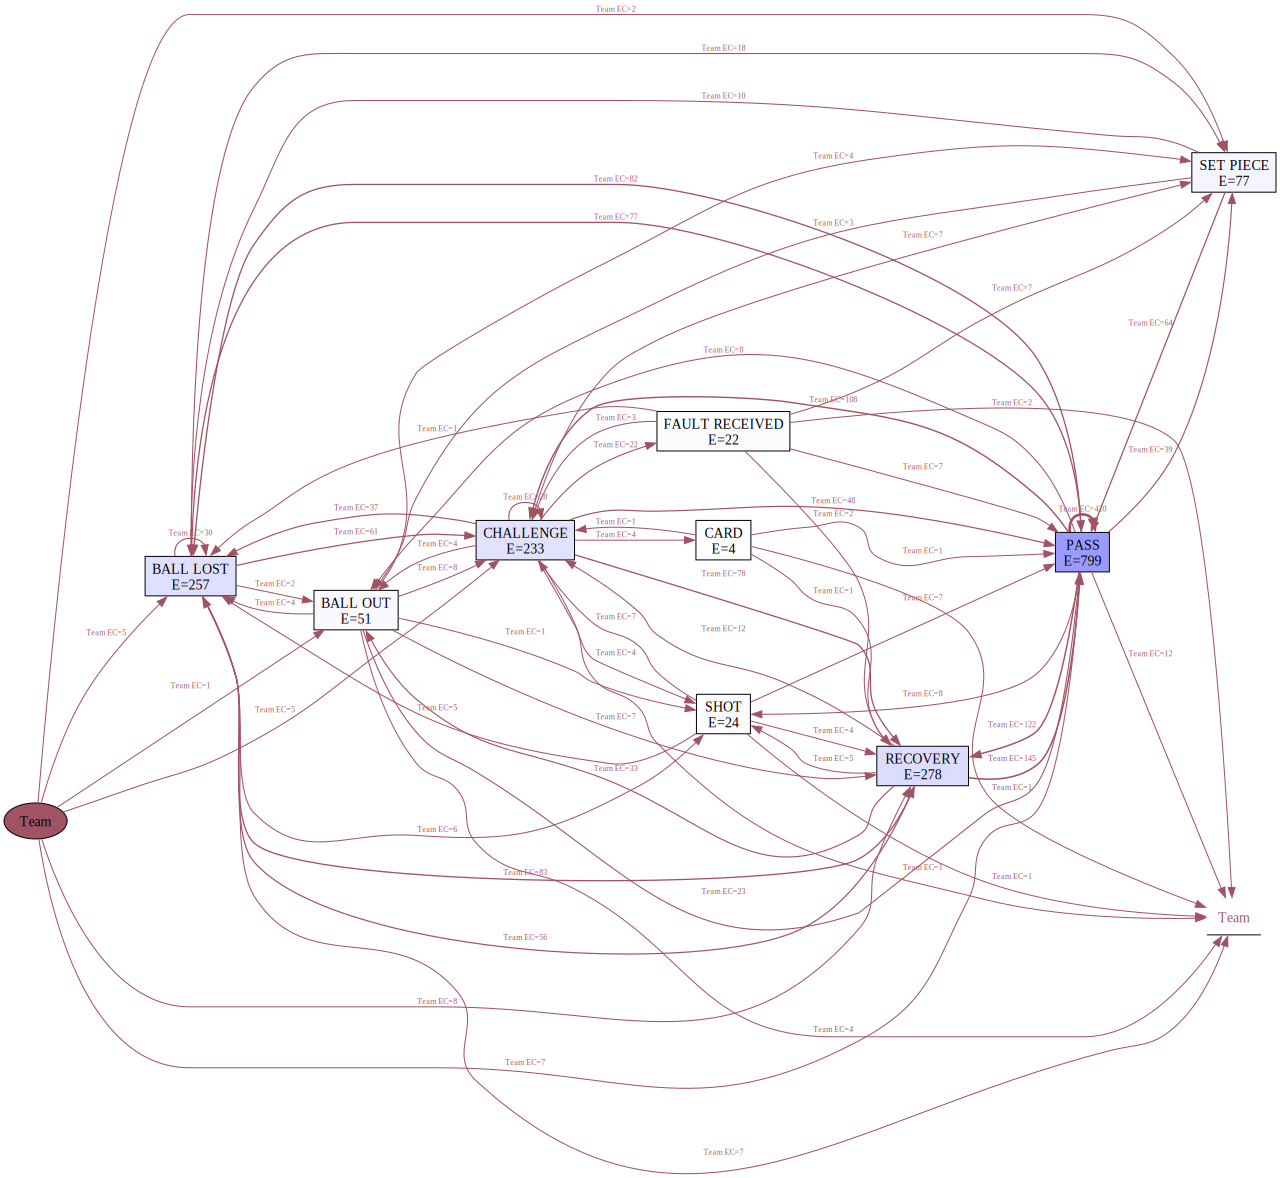

In [26]:
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [30]:
print(pm4py.__version__)

2.2.32


In [ ]:
from ocpa.objects.log.importer.csv import factory as ocel_import_factory
filename = "sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv"
object_types = ["From", "To"]
parameters = {"obj_names":object_types,
              "val_names":[],
              "act_name":"Type",
              "time_name":"Start Time [s]",
              "sep":","}
ocel = ocel_import_factory.apply(file_path= filename,parameters = parameters)

KeyError: 'sep'

In [4]:
df_log = pm4py.format_dataframe(df)

Exception: case:concept:name column (case ID) is not in the dataframe!

In [ ]:
import pandas as pd
#from pm4py.objects.ocel.importer.importer import apply as import_ocel
from pm4py.objects.ocel.obj import OCEL
import uuid
from datetime import datetime, timedelta



# --- Create OCEL Relations Table ---
relations = []

for idx, row in df.iterrows():
    eid = str(row['event_id'])
    for col in ['From', 'To']:
        if pd.notna(row[col]):
            relations.append({
                "ocel:eid": eid,
                "ocel:oid": row[col],
                "ocel:otype": "player"
            })

relations_df = pd.DataFrame(relations)

# --- Create OCEL Objects Table ---
player_ids = pd.unique(relations_df["ocel:oid"])
objects_df = pd.DataFrame({
    "ocel:oid": player_ids,
    "ocel:otype": ["player"] * len(player_ids)
})

# --- Create the OCEL ---
ocel = OCEL(events=events_df, objects=objects_df, relations=relations_df)





In [8]:
from pm4py.objects.ocel.util.flattening import flatten

# Flatten the OCEL using 'player' as the object type
df_flattened = flatten(ocel, ot='player')
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

# Discover the DFG
dfg = dfg_discovery.apply(df_flattened)

# Visualize the DFG
gviz = dfg_visualization.apply(dfg)
dfg_visualization.view(gviz)

KeyError: 'ocel:type'

Signature:
pd_to_ocel(
    df: pandas.core.frame.DataFrame,
    parameters: Optional[Dict[Any, Any]] = None,
) -> pm4py.objects.ocel.obj.OCEL
Docstring:
Transforms a dataframe to an OCEL

Parameters
-----------------
df
    Pandas dataframe
parameters
    Parameters of the algorithm, including:
    - Parameters.TARGET_OBJECT_TYPE => the name of the object type to which the cases should be mapped
    - Parameters.ACTIVITY_KEY => the attribute to use as activity
    - Parameters.TIMESTAMP_KEY => the attribute to use as timestamp
    - Parameters.CASE_ID_KEY => the attribute to use as case identifier
    - Parameters.CASE_ATTRIBUTE_PREFIX => the prefix identifying the attributes at the case level

Returns
-----------------
ocel
    OCEL (equivalent to the provided event log)
File:      c:\users\vito\documents\pm\soccer\.venv\lib\site-packages\pm4py\objects\ocel\util\log_ocel.py
Type:      function